# Nishant Seth
# Data Science & Business Analytics Internship @ The Spark Foundation (TSF)
# **Topic:** Prediction using Supervised ML

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sn
import matplotlib.pyplot as pl  
%matplotlib inline

## Reading data from URL

In [2]:
url = "http://bit.ly/w-data"
d = pd.read_csv(url)
print("Successfully loaded")

Successfully loaded


In [3]:
print(d)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


## Exploratory Data Analysis on the Dataset

In [4]:
d.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
d.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
d.shape

(25, 2)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
d.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
d.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
d.duplicated().sum()

0

## Visualization of Data using Plots

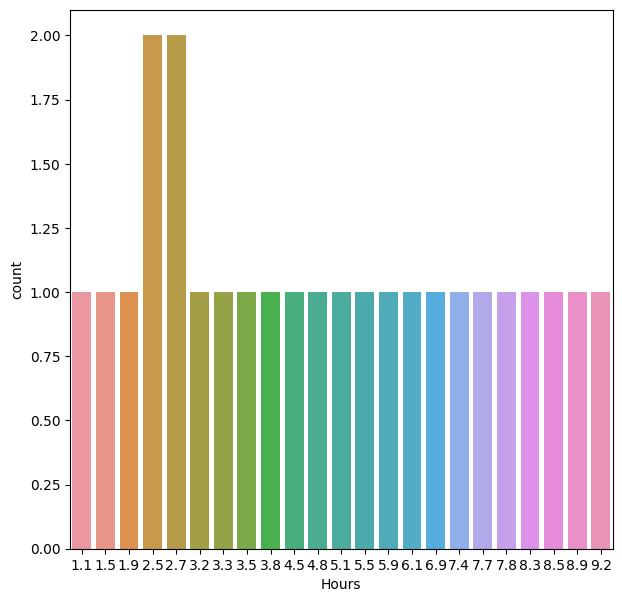

In [11]:
pl.figure(figsize = (7, 7))
sn.countplot(x = d["Hours"])
pl.show()

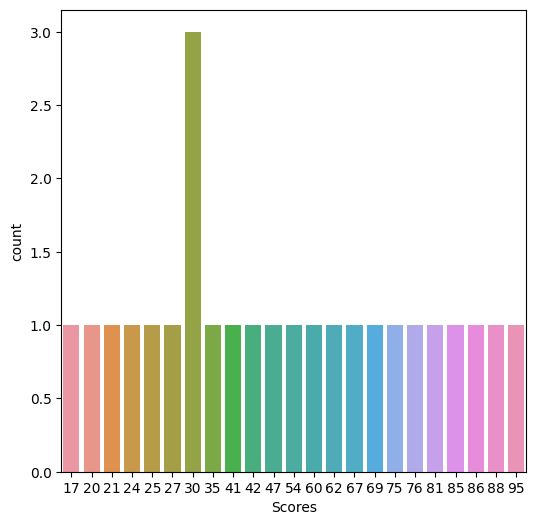

In [12]:
pl.figure(figsize = (6, 6))
sn.countplot(x = d["Scores"])
pl.show()

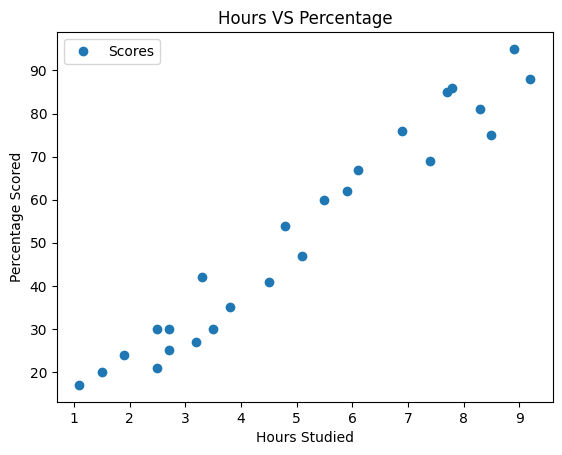

In [13]:
d.plot(x = "Hours", y = "Scores", style = "o")
pl.title("Hours VS Percentage")
pl.xlabel("Hours Studied")
pl.ylabel("Percentage Scored")
pl.show()

## Predict Outcome using Supervised Machine Learning

In [14]:
X = d.iloc[:, :-1].values
y = d.iloc[:, 1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Successfully Trained")

Successfully Trained


In [17]:
x_pred = reg.predict(X_train)

### Plotting Regression Plot of Training Model

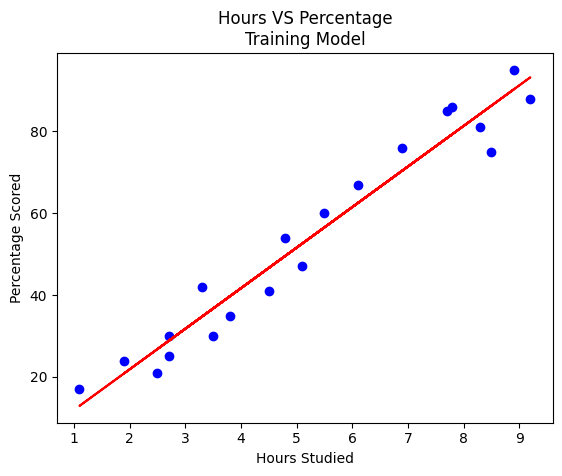

In [18]:
pl.scatter(X_train, y_train, color ="blue" )
pl.plot(X_train, x_pred, c="r")
pl.title("Hours VS Percentage\nTraining Model")
pl.xlabel("Hours Studied")
pl.ylabel("Percentage Scored")
pl.show()

### Plotting Regression Plot of Training Model

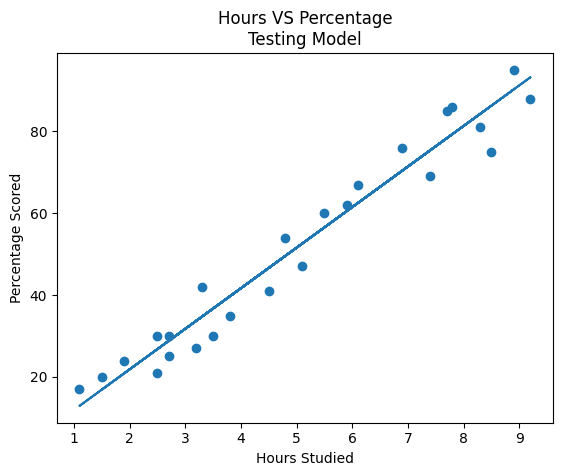

In [19]:
line = reg.coef_*X+reg.intercept_

pl.scatter(X, y)
pl.plot(X, line)
pl.title("Hours VS Percentage\nTesting Model")
pl.xlabel("Hours Studied")
pl.ylabel("Percentage Scored")
pl.show()

## Predicting Scores and Mean Absolute Error between the Actual Score and Predicted Score

In [20]:
print(X_test)                   # Test Data: In Hours
y_pred = reg.predict(X_test)    # Predicting Scores on the basis of Test Data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
from sklearn import metrics
print("Mean Absolute Error: ",
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002982
